# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web enlazada en el campus virtual, y de título "Países por población: pasado, presente y futuro" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [1]:
# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [2]:
# Ojo, en este documento html el separador de miles es un punto
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population"

# Imprimimos el número de tablas que hemos leído mediante la función len(). Deberían ser 3.

# Opcion 1 

# Utilizamos read_html() para leer las tablas del documento HTML
tables = pd.read_html(url, thousands=',')

# Imprimimos el numero de tablas leidas
print("Número de tablas leídas:", len(tables))
# out: Número de tablas leídas: 4

# Opcion 2 quitamos la ultima tras visualizaarlas

# Utilizamos read_html() para leer las tablas del documento HTML
tables = pd.read_html(url, thousands=',')[:3]
# out: Número de tablas leídas: 3

# Imprimimos el numero de tablas leidas
print("Número de tablas leídas:", len(tables))
# Imprimimos las   tablas la ultima no es de poblacion

#  Opcion 3 filtramos las tablas 

tables = pd.read_html(url, thousands=',')

# Filtramos las tablas que tengan una columna llamada Country (or dependent territory)
filtered_tables = [table for table in tables if 'Country (or dependent territory)' in table.columns]

# Imprimimos el numero de tablas leidas
print("Número de tablas leídas:", len(filtered_tables))
# out: Número de tablas leídas: 3

# visualizacion de la tabla
#for i, table in enumerate(filtered_tables[:4]):
#    print(f"Tabla {i + 1}:")
#    print(table)

# comprimido en una linea
tabla_poblacion=[table for table in pd.read_html(url, thousands=',') if 'Country (or dependent territory)' in table.columns]



Número de tablas leídas: 4
Número de tablas leídas: 3
Número de tablas leídas: 3


In [3]:
# Convierte las tablas filtradas en DataFrames de pandas
dataframes_poblacion = [pd.DataFrame(table) for table in tabla_poblacion]
dataframes_poblacion_withou_colum_labe=[pd.DataFrame(table) for table in tabla_poblacion]
# Itera a través de los DataFrames y modifica la estructura de cada uno
for i, df in enumerate(dataframes_poblacion):
    # Establece la columna "Country (or dependent territory)" como el índice
    df.set_index("Country (or dependent territory)", inplace=True)
    
    # Restablece el nombre de la columna de índice (que era "Country (or dependent territory)") a None
    # esto le quitaria el nombre a la columna por si se quieren visualizar los años ya que sabemos 
    # que la primera columna 
    # df.index.name = None
for i, df in enumerate(dataframes_poblacion_withou_colum_labe):
    # Establece la columna "Country (or dependent territory)" como el índice
    df.set_index("Country (or dependent territory)", inplace=True)
    
    df.index.name = None
    
for i, table in enumerate(dataframes_poblacion):
    print(f"Tabla {i + 1}:")
    print(table)


Tabla 1:
                                     1950     1955      %     1960    %.1  \
Country (or dependent territory)                                            
Afghanistan                          8151     8892   1.76     9830   2.03   
Albania                              1228     1393   2.56     1624   3.12   
Algeria                              8893     9842   2.05    10910   2.08   
American Samoa                         20       20   0.72       21   0.20   
Andorra                                 7        7   0.04        9   6.28   
...                                   ...      ...    ...      ...    ...   
Western Sahara                         10       16  11.87       28  11.87   
Yemen                                4778     5266   1.97     5872   2.20   
Zambia                               2554     2870   2.36     3255   2.55   
Zimbabwe                             2854     3410   3.62     4011   3.31   
World                             2557629  2782099   1.70  3043002 

## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [4]:
def concat_tables(dataframes_poblacion,show=True):
    #Reunimos las tres tablas en una sola.
    # population_data = [table if indx == 0 else table.drop(table.columns[1], axis=1) for indx, table in enumerate(selected_tables)]
    population_data = pd.concat(dataframes_poblacion,axis=1)

    # Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante 
    # isnumeric() verificar si una cadena (string) está compuesta únicamente por caracteres numéricos. 
    # Puede ser util el utilizar la noción de 'list comprehension' por sencillez
    # Generamos una lista con la información almacenada en las columnas
    column_info = list(population_data.columns)
    date_columns = [col for ind,col in enumerate(column_info) if str(col).isnumeric() or (ind==0 and not str(col).isnumeric() )  ]

    # Leemos la tabla por fechas y la almacenamos para su uso
    population_by_years = population_data[date_columns]
    if show:
        # Imprimimos las primeras filas a modo de comprobación, 
        # mediante head() muestra las primeras filas de un DataFrame o una Serie.
        print("Head de las tres tablas combinadas:\n")
        print(population_data.head())
        # Imprimimos para verificar que es correcto
        print("\nTabla de población por años:\n")
        print(population_by_years.head())
    return population_data,population_by_years

population_data,population_by_years=concat_tables(dataframes_poblacion,show=True)

Head de las tres tablas combinadas:

                                  1950  1955     %   1960   %.1   1965    %.2  \
Country (or dependent territory)                                                
Afghanistan                       8151  8892  1.76   9830  2.03  10998   2.27   
Albania                           1228  1393  2.56   1624  3.12   1884   3.02   
Algeria                           8893  9842  2.05  10910  2.08  11964   1.86   
American Samoa                      20    20  0.72     21  0.20     25   4.23   
Andorra                              7     7  0.04      9  6.28     14  10.17   

                                   1970   %.3   1975  ...   2030   %.2   2035  \
Country (or dependent territory)                      ...                       
Afghanistan                       12431  2.48  14133  ...  45665  2.12  50195   
Albania                            2157  2.74   2402  ...   3103 -0.01   3063   
Algeria                           13932  3.09  16141  ...  48149  0.99 

In [5]:
population_data,population_by_years_wl=concat_tables(dataframes_poblacion_withou_colum_labe,show=True)

Head de las tres tablas combinadas:

                1950  1955     %   1960   %.1   1965    %.2   1970   %.3  \
Afghanistan     8151  8892  1.76   9830  2.03  10998   2.27  12431  2.48   
Albania         1228  1393  2.56   1624  3.12   1884   3.02   2157  2.74   
Algeria         8893  9842  2.05  10910  2.08  11964   1.86  13932  3.09   
American Samoa    20    20  0.72     21  0.20     25   4.23     28  2.08   
Andorra            7     7  0.04      9  6.28     14  10.17     20  7.49   

                 1975  ...   2030   %.2   2035   %.3   2040   %.4   2045  \
Afghanistan     14133  ...  45665  2.12  50195  1.91  54717  1.74  59256   
Albania          2402  ...   3103 -0.01   3063 -0.26   2994 -0.45   2913   
Algeria         16141  ...  48149  0.99  50118  0.80  52030  0.75  53894   
American Samoa     30  ...     53 -0.32     52 -0.45     51 -0.45     50   
Andorra            27  ...     85 -0.21     83 -0.30     82 -0.46     79   

                 %.5   2050   %.6  
Afghanistan  

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [6]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
ejercicio_1 = population_by_years.loc[["Germany", "Andorra", "Angola"], "2015":"2025"]
print(ejercicio_1)

                                     2015   2020   2025
Country (or dependent territory)                       
Germany                           80855.0  82983  80025
Andorra                              86.0     86     86
Angola                            19626.0  22485  25674


In [7]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
ejercicio_1 = population_by_years_wl.loc[["Germany", "Andorra", "Angola"], "2015":"2025"]
print(ejercicio_1)

            2015   2020   2025
Germany  80855.0  82983  80025
Andorra     86.0     86     86
Angola   19626.0  22485  25674


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [8]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
ejercicio_2 = population_by_years.iloc[3:8,5:9]
print(ejercicio_2)

                                  1975  1980    1985    1990
Country (or dependent territory)                            
American Samoa                      30    33    39.0    48.0
Andorra                             27    34    45.0    53.0
Angola                            6051  7206  8390.0  9486.0
Anguilla                             7     7     7.0     9.0
Antigua and Barbuda                 69    69    65.0    65.0


In [9]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
ejercicio_2 = population_by_years_wl.iloc[3:8,5:9]
print(ejercicio_2)

                     1975  1980    1985    1990
American Samoa         30    33    39.0    48.0
Andorra                27    34    45.0    53.0
Angola               6051  7206  8390.0  9486.0
Anguilla                7     7     7.0     9.0
Antigua and Barbuda    69    69    65.0    65.0


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [10]:
# Creamos una columna mediante selección por el título de la columna
ejercicio_3 = population_by_years["1955"]
print(ejercicio_3)

Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: int64


In [11]:
# Creamos una columna mediante selección por el título de la columna
ejercicio_3 = population_by_years_wl["1955"]
print(ejercicio_3)

Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: int64


### Ejercicio 4
Imprimir los datos de la fila número 15.

In [12]:
# Seleccionamos una fila mediante la opción .iloc

ejercicio_4 = population_by_years.iloc[15,:]
print(ejercicio_4)

1950     115.0
1955     131.0
1960     157.0
1965     192.0
1970     220.0
1975     259.0
1980     348.0
1985     424.0
1990     506.0
1995     583.0
2000     655.0
2005     916.0
2010    1181.0
2015    1347.0
2020    1506.0
2025    1580.0
2030    1639.0
2035    1701.0
2040    1759.0
2045    1806.0
2050    1848.0
Name: Bahrain, dtype: float64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [13]:
# Seleccionamos una celda mediante la opción .loc
fecha="1995"
lugar="Barbados"
ejercicio_5 = population_by_years.loc[lugar,fecha]
print(f"fecha: {fecha}, lugar: {lugar}, poblacion: {ejercicio_5}")

fecha: 1995, lugar: Barbados, poblacion: 268.0


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [14]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
# Eliminamos las filas que representan valores totales mundiales, si las hay
population_by_years = population_by_years[~population_by_years.index.str.contains("World")]

# Utilizamos la función max() para calcular el máximo en 1975
max_population_1975 = population_by_years["1975"].max()

# Utilizamos idxmax() para identificar el país correspondiente al valor máximo en 1975
country_with_max_population_1975 = population_by_years["1975"].idxmax()

# Imprimimos el valor máximo y el país correspondiente
print("Valor máximo de población en 1975:", max_population_1975)
print("País correspondiente al valor máximo en 1975:", country_with_max_population_1975)


Valor máximo de población en 1975: 920295
País correspondiente al valor máximo en 1975: China


### Ejercicio 7
Imprimir los nombres de las filas.

In [15]:
# Utilizamos la opción .index
# Utilizamos index() para identificar  los nombres de las filas.
nombres_de_las_filas = population_by_years.index
print("Los nombres de las filas son los siguientas: \n\n ",nombres_de_las_filas)

Los nombres de las filas son los siguientas: 

  Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib.

In [16]:
# Mediante la función plt.bar() de las librerías matplotlib
# Ordenar el DataFrame por población en 1995 (de menor a mayor)
# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
# Utilizamos la función .sort_values() para ordenar la subtabla   

population_1995 = population_by_years.loc[['Argentina', 'Sweden', 'Poland' ,'Libya'], "1995"].sort_values()



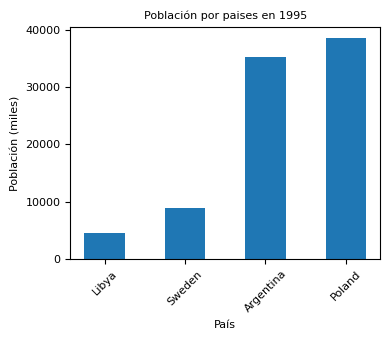

In [17]:
# Especificar el tamaño de la figura (ancho x alto en pulgadas)
fig, ax = plt.subplots(figsize=(4, 3.5))
# Calcular el tamaño proporcional de las letras basado en el tamaño de la figura
proporcion_titulo = 2 * fig.get_figwidth()  # Ajusta el factor  según tus preferencias
# Calcular el tamaño proporcional de las barras basado en la cantidad de datos y el tamño de la tabla
ancho_barras =  0.5 * fig.get_figwidth()/len(population_1995)
# Crear el gráfico de barras y .plot(kind='bar') para dibujar  
ax.bar(population_1995.index, population_1995, width=ancho_barras, align='center')

# Agregar etiquetas y título al gráfico
# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
ax.set_xlabel('País', fontsize=proporcion_titulo)
# Podemos utilizar plt.ylabel() para especificar 'población (miles)'
ax.set_ylabel('Población (miles)', fontsize=proporcion_titulo)
ax.set_title('Población por paises en 1995', fontsize=proporcion_titulo)

# Rotar etiquetas en el eje x y reescalamos el tamaño para mayor legibilidad
plt.xticks(rotation=45,fontsize=proporcion_titulo)
plt.yticks(fontsize=proporcion_titulo)
# Ajustar el diseño para evitar que se recorten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


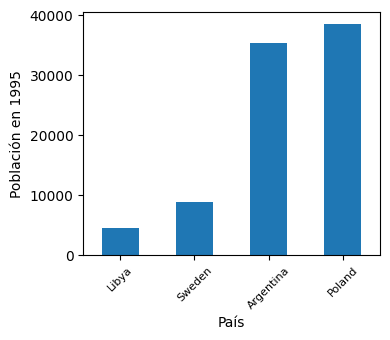

In [18]:
# Crear un objeto de figura y ejes
fig, ax = plt.subplots(figsize=(4, 3.5))
# Calcular el tamaño proporcional de las letras basado en el tamaño de la figura
proporcion_titulo = 2 * fig.get_figwidth()  # Ajusta el factor  según tus preferencias
# Calcular el tamaño proporcional de las barras basado en la cantidad de datos y el tamño de la tabla
ancho_barras =  0.5 * fig.get_figwidth()/len(population_1995)

# Utilizar el método plot(kind='bar') para crear un gráfico de barras
population_1995.plot(kind='bar', x='País', y='Población_1995', ax=ax, width=ancho_barras)

ax.set_xticklabels(population_1995.index, rotation=45, fontsize=proporcion_titulo)  # Ajusta el tamaño de fuente según tus preferencias

# Agregar etiquetas al gráfico
ax.set_xlabel('País')
ax.set_ylabel('Población en 1995')

# Ajustar el diseño para evitar que se recorten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

Index(['Germany', 'Spain', 'United States', 'Italy'], dtype='object', name='Country (or dependent territory)')


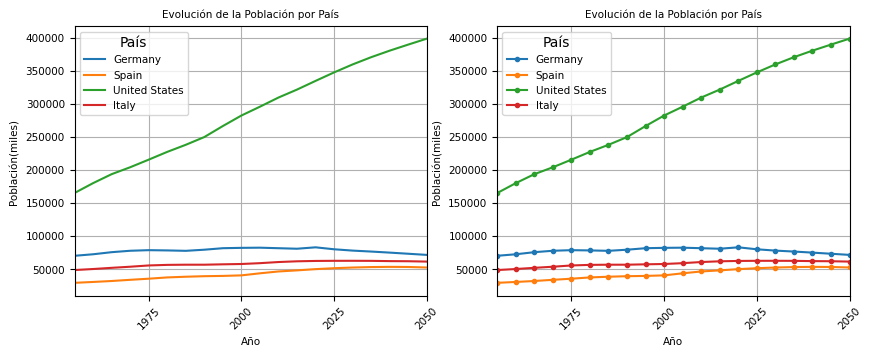

In [19]:
# Mediante la función plot de las librerías matplotlib
paises_interes =['Germany', 'Spain', 'United States', 'Italy']
# Generamos la subtabla correspondiente con la opción .loc
population_subset=population_by_years.loc[paises_interes,:]
print(population_subset.index)


# Transponer el DataFrame para que los años estén en el eje x
population_transposed = population_subset.T
# Crear una figura y ejes para los subplots
num_graf=2
fig, axes = plt.subplots(1, num_graf, figsize=(10, 3.5))
proporcion_titulo = 1.5 * fig.get_figwidth()/num_graf
for i in range(num_graf):
    ax = axes[i]
    # Utilizamos la función plot(kind='line') para dibujar
    if i==1:
        # Crear un gráfico de líneas para la evolución de la población
        # el argumento x para especificar las etiquetas del eje x
        population_transposed.plot(kind='line', marker='.',ax=ax)
    else:
        population_transposed.plot(kind='line',ax=ax)

    # Personalizar el gráfico con etiquetas y leyenda
    #ax.title('Evolución de la Población por País')
    #ax.xlabel('Año')
    #ax.ylabel('Población')
    
    # Etiquetar los ejes
    ax.set_title('Evolución de la Población por País',fontsize=proporcion_titulo)
    ax.set_xlabel('Año',fontsize=proporcion_titulo)
    ax.set_ylabel('Población(miles)',fontsize=proporcion_titulo)
    ax.legend(title='País',fontsize=proporcion_titulo)
    ax.set_xlim(1,20) 
    ax.grid(True)
    
    # Rotar etiquetas en el eje x y reescalamos el tamaño para mayor legibilidad
    ax.tick_params(axis='x', rotation=45, labelsize=proporcion_titulo)  # Configurar ticks en el eje X

    ax.tick_params(axis='y',labelsize=proporcion_titulo)
    
    
# Mostrar el gráfico
plt.show()



## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

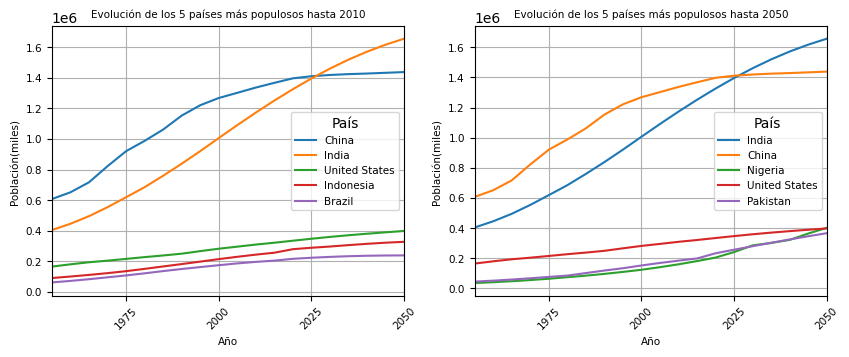

In [20]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(tabla, ano,ax):
    
    # Ordenamos la tabla según el año
    tabla_ordenada= tabla.sort_values(by=ano,ascending=False)
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    top_5=tabla_ordenada.iloc[0:5,:]
    
    top_5_traspose=top_5.T
    # Utilizamos la función plot(kind='line') para dibujar
   
    top_5_traspose.plot(kind='line',ax=ax)

    # Personalizar el gráfico con etiquetas y leyenda
    #ax.title('Evolución de la Población por País')
    #ax.xlabel('Año')
    #ax.ylabel('Población')
    
    # Etiquetar los ejes
    ax.set_title(f'Evolución de los 5 países más populosos hasta {ano}',fontsize=proporcion_titulo)
    ax.set_xlabel('Año',fontsize=proporcion_titulo)
    ax.set_ylabel('Población(miles)',fontsize=proporcion_titulo)
    ax.legend(title='País',fontsize=proporcion_titulo)
    ax.set_xlim(1,20) 
    ax.grid(True)
    
    # Rotar etiquetas en el eje x y reescalamos el tamaño para mayor legibilidad
    ax.tick_params(axis='x', rotation=45, labelsize=proporcion_titulo)  # Configurar ticks en el eje X

    ax.tick_params(axis='y',labelsize=proporcion_titulo)
    
    
# Crear una figura y ejes para los subplots
num_graf=2
fig, axes = plt.subplots(1, num_graf, figsize=(10, 3.5))
proporcion_titulo = 1.5 * fig.get_figwidth()/num_graf
for i in range(num_graf):
    ax = axes[i]
    if i == 0:
        plot_populosos(population_by_years,"2010",ax)
    else:
        plot_populosos(population_by_years,"2050",ax)
    
    
# Mostrar el gráfico
plt.show()
